In [6]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import nn
import re
import os
# from prenet.resnet import resnet50
# from prenet.prenet import PRENet
from timm.models import create_model
import torch.nn.functional as F
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


'''
015_000101heat  
021_5.015719793109707heat
027_000059heat
024_000059heat
046_000010heat
051_000025heat
063_000001heat
076_000009heat
073_000109heat
100_000050heat
109_000009heat
124_000001heat
122_000033heat
129_000024heat
126_000029heat
134_000042heat
144_000071heat
156_000000heat
192_410.82251889566675heat
194_000000heat
207_000031heat
216_8.78442873590168heat
218_2.7672608330720756heat
219_1.8203088069711892heat
225_6.320396054494243heat
228_8.067893909653899heat
229_5.30089462658354heat
232_2.980463359419659heat
234_13.644777726796848heat
237_10.172250266846223heat
240_1.7018671383949395heat
'''



# Load your pre-trained model weights
# weight_path = "/home/meow/cnfood241/food_code_cn241/outputs/vgg16.tv_in1k_224_cn241/model.pth"
# model = create_model('vgg16.tv_in1k', pretrained=True, num_classes=241)
# model.load_state_dict(torch.load(weight_path))
# model.eval()
# print(model)
weight_path = "/home/meow/cnfood241/food_code_cn241/outputs/cmal_resnet50_cnfood241_cloud_weight/model.pth"
model = torch.load(weight_path)
model.eval()
print(model)

target = 63

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((550, 550)),
    transforms.RandomCrop(448, padding=8),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

transform_normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    image.requires_grad = True  # Ensure requires_grad is True
    return image



# Example usage
pit_n = '63n000001.jpg'
image_path = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/' + pit_n
output_dir = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/caml_heatmap'
# visualize_and_save_gradcam(image_path, wrapped_model, target_layer, output_dir)


test_img = Image.open(image_path)
test_img_data = np.asarray(test_img)

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension


layer_gradcam = LayerGradCam(model, model.conv_block3[1])
attributions_lgc = layer_gradcam.attribute(input_img, target=target)

# _ = viz.visualize_image_attr(attributions_lgc[0].cpu().permute(1,2,0).detach().numpy(),
#                              sign="all",
#                              title="pre_logits")

upsamp_attr_lgc = LayerAttribution.interpolate(attributions_lgc, input_img.shape[2:])
print(upsamp_attr_lgc[0].shape)
# _ = viz.visualize_image_attr(upsamp_attr_lgc[0].cpu().permute(1,2,0).detach().numpy(),
#                              sign="all",
#                              title="pre_logits")

print(attributions_lgc.shape)
print(upsamp_attr_lgc.shape)
print(input_img.shape)

# Debug: Check for zero scale factor
attr_np = upsamp_attr_lgc[0].cpu().permute(1,2,0).detach().numpy()
if np.max(attr_np) == np.min(attr_np):
    print("Warning: Attributions have zero scale factor. Normalization will fail.")

# _ = viz.visualize_image_attr_multiple(attr_np,
#                                       transformed_img.permute(1,2,0).numpy(),
#                                       ["original_image","blended_heat_map","masked_image"],
#                                       ["all","positive","positive"],
#                                       show_colorbar=True,
#                                       titles=["Original", "Positive Attribution", "Masked"],
#                                       fig_size=(18, 6))




integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input_img, target=21, n_steps=200)

default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

CMALNet(
  (Features): Features(
    (net_layer_0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    )
    (net_layer_1): Sequential(
      (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (net_layer_2): Sequential(
      (0): ReLU(inplace=True)
    )
    (net_layer_3): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (net_layer_4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d

AttributeError: 'tuple' object has no attribute 'shape'

In [25]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import nn
import re
import os
# from prenet.resnet import resnet50
# from prenet.prenet import PRENet
from timm.models import create_model
import torch.nn.functional as F
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


'''
015_000101heat  
021_5.015719793109707heat
027_000059heat
024_000059heat
046_000010heat
051_000025heat
063_000001heat
076_000009heat
073_000109heat
100_000050heat
109_000009heat
124_000001heat
122_000033heat
129_000024heat
126_000029heat
134_000042heat
144_000071heat
156_000000heat
192_410.82251889566675heat
194_000000heat
207_000031heat
216_8.78442873590168heat
218_2.7672608330720756heat
219_1.8203088069711892heat
225_6.320396054494243heat
228_8.067893909653899heat
229_5.30089462658354heat
232_2.980463359419659heat
234_13.644777726796848heat
237_10.172250266846223heat
240_1.7018671383949395heat
'''

# Load your pre-trained model weights
# weight_path = "/home/meow/cnfood241/food_code_cn241/outputs/vgg16.tv_in1k_224_cn241/model.pth"
# model = create_model('vgg16.tv_in1k', pretrained=True, num_classes=241)
# model.load_state_dict(torch.load(weight_path))
# model.eval()
# print(model)
# weight_path = "/home/meow/ResVmamba_data/ResVMamba_weight/res_vmamba_cnf241_result_best/vssm_small/default/ckpt_epoch_166.pth"
weight_path = "/home/meow/cnfood241/food_code_cn241/outputs/tf_efficientnet_b6.ap_in1k_cnf241/model.pth"
model = create_model('tf_efficientnet_b6.ap_in1k', pretrained=True, num_classes=241)
model = torch.load(weight_path)
# model.eval()
print(model.keys())

target = 63

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((550, 550)),
    transforms.RandomCrop(448, padding=8),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

transform_normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    image.requires_grad = True  # Ensure requires_grad is True
    return image



# Example usage
pit_n = '63n000001.jpg'
image_path = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/' + pit_n
output_dir = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/caml_heatmap'
# visualize_and_save_gradcam(image_path, wrapped_model, target_layer, output_dir)


test_img = Image.open(image_path)
test_img_data = np.asarray(test_img)

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension


layer_gradcam = LayerGradCam(model, model.classifier.weight)
attributions_lgc = layer_gradcam.attribute(input_img, target=target)

# _ = viz.visualize_image_attr(attributions_lgc[0].cpu().permute(1,2,0).detach().numpy(),
#                              sign="all",
#                              title="pre_logits")

upsamp_attr_lgc = LayerAttribution.interpolate(attributions_lgc, input_img.shape[2:])
print(upsamp_attr_lgc[0].shape)
# _ = viz.visualize_image_attr(upsamp_attr_lgc[0].cpu().permute(1,2,0).detach().numpy(),
#                              sign="all",
#                              title="pre_logits")

print(attributions_lgc.shape)
print(upsamp_attr_lgc.shape)
print(input_img.shape)

# Debug: Check for zero scale factor
attr_np = upsamp_attr_lgc[0].cpu().permute(1,2,0).detach().numpy()
if np.max(attr_np) == np.min(attr_np):
    print("Warning: Attributions have zero scale factor. Normalization will fail.")

# _ = viz.visualize_image_attr_multiple(attr_np,
#                                       transformed_img.permute(1,2,0).numpy(),
#                                       ["original_image","blended_heat_map","masked_image"],
#                                       ["all","positive","positive"],
#                                       show_colorbar=True,
#                                       titles=["Original", "Positive Attribution", "Masked"],
#                                       fig_size=(18, 6))




integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input_img, target=21, n_steps=200)

default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

odict_keys(['conv_stem.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'blocks.0.0.conv_dw.weight', 'blocks.0.0.bn1.weight', 'blocks.0.0.bn1.bias', 'blocks.0.0.bn1.running_mean', 'blocks.0.0.bn1.running_var', 'blocks.0.0.bn1.num_batches_tracked', 'blocks.0.0.se.conv_reduce.weight', 'blocks.0.0.se.conv_reduce.bias', 'blocks.0.0.se.conv_expand.weight', 'blocks.0.0.se.conv_expand.bias', 'blocks.0.0.conv_pw.weight', 'blocks.0.0.bn2.weight', 'blocks.0.0.bn2.bias', 'blocks.0.0.bn2.running_mean', 'blocks.0.0.bn2.running_var', 'blocks.0.0.bn2.num_batches_tracked', 'blocks.0.1.conv_dw.weight', 'blocks.0.1.bn1.weight', 'blocks.0.1.bn1.bias', 'blocks.0.1.bn1.running_mean', 'blocks.0.1.bn1.running_var', 'blocks.0.1.bn1.num_batches_tracked', 'blocks.0.1.se.conv_reduce.weight', 'blocks.0.1.se.conv_reduce.bias', 'blocks.0.1.se.conv_expand.weight', 'blocks.0.1.se.conv_expand.bias', 'blocks.0.1.conv_pw.weight', 'blocks.0.1.bn2.weight', 'blocks.0.1.bn

AttributeError: 'collections.OrderedDict' object has no attribute 'classifier'

In [1]:
import torch
from torchvision import transforms
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import nn
from timm.models import create_model
import captum
from captum.attr import IntegratedGradients, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

def get_cdict():
    _jet_data = {
              # 'red':   ((0.00, 0, 0),
              #          (0.35, 0, 0),
              #          (0.66, 1, 1),
              #          (0.89, 1, 1),
              #          (1.00, 0.5, 0.5)),
              'red':   ((0.00, 0, 0),
                       (0.35, 0.5, 0.5),
                       (0.66, 1, 1),
                       (0.89, 1, 1),
                       (1.00, 0.8, 0.8)),
             'green': ((0.000, 0, 0),
                       (0.125, 0, 0),
                       (0.375, 1, 1),
                       (0.640, 1, 1),
                       (0.910, 0.3, 0.3),
                       (1.000, 0, 0)),
             # 'blue':  ((0.00, 0.5, 0.5),
             #           (0.11, 1, 1),
             #           (0.34, 1, 1),
             #           (0.65, 0, 0),
             #           (1.00, 0, 0))}
             'blue':  ((0.00, 0.30, 0.30),
                       (0.25, 0.8, 0.8),
                       (0.34, 0.8, 0.8),
                       (0.65, 0, 0),
                       (1.00, 0, 0))
             }
    return _jet_data

# Load your pre-trained model weights
weight_path = "/home/meow/cnfood241/food_code_cn241/outputs/tf_efficientnet_b6.ap_in1k_cnf241/model.pth"
model = create_model('tf_efficientnet_b6.ap_in1k', pretrained=True, num_classes=241)
model.load_state_dict(torch.load(weight_path))
model.eval()

target = 63

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((550, 550)),
    transforms.RandomCrop(448, padding=8),
    transforms.ToTensor()
])

transform_normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# Load and preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    image.requires_grad = True  # Ensure requires_grad is True
    return image

# Example usage
pit_n = '63n000001.jpg'
image_path = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/' + pit_n
output_dir = '/home/meow/cnfood241/food_code_cn241/herbs_heatmap_cnf241_val/caml_heatmap'

test_img = Image.open(image_path)
test_img_data = np.asarray(test_img)

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0)  # the model requires a dummy batch dimension

# Identify the target layer for Grad-CAM
target_layer = model.blocks[-1]  # Adjust this to the correct layer in your model

layer_gradcam = LayerGradCam(model, target_layer)
attributions_lgc = layer_gradcam.attribute(input_img, target=target)

upsamp_attr_lgc = LayerAttribution.interpolate(attributions_lgc, input_img.shape[2:])
print(upsamp_attr_lgc[0].shape)

print(attributions_lgc.shape)
print(upsamp_attr_lgc.shape)
print(input_img.shape)

# Debug: Check for zero scale factor
attr_np = upsamp_attr_lgc[0].cpu().permute(1, 2, 0).detach().numpy()
if np.max(attr_np) == np.min(attr_np):
    print("Warning: Attributions have zero scale factor. Normalization will fail.")

# # Visualize the Grad-CAM heatmap
# _ = viz.visualize_image_attr_multiple(attr_np,
#                                       transformed_img.permute(1, 2, 0).numpy(),
#                                       ["original_image", "blended_heat_map", "masked_image"],
#                                       ["all", "positive", "positive"],
#                                       show_colorbar=True,
#                                       titles=["Original", "Positive Attribution", "Masked"],
#                                       fig_size=(18, 6))

# integrated_gradients = IntegratedGradients(model)
# attributions_ig = integrated_gradients.attribute(input_img, target=21, n_steps=200)

# default_cmap = LinearSegmentedColormap.from_list('custom blue', 
#                                                  [(0, '#ffffff'),
#                                                   (0.25, '#000000'),
#                                                   (1, '#000000')], N=256)
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input_img, target=21, n_steps=200)





/home/meow/anaconda3/envs/food_py10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 448, 448])
torch.Size([1, 1, 14, 14])
torch.Size([1, 1, 448, 448])
torch.Size([1, 3, 448, 448])


: 

In [ ]:
cdict = get_cdict()
cmap = matplotlib.colors.LinearSegmentedColormap("jet_revice", cdict)

fig, ax =plt.subplots()
_ = viz.visualize_image_attr(
                np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1, 2, 0)),
                np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1, 2, 0)),
                method='blended_heat_map',
                cmap=cmap,
                show_colorbar=False,
                sign='positive',
                outlier_perc=1,
                plt_fig_axis=(fig, ax)
                # title='Blended Heat Map'
)

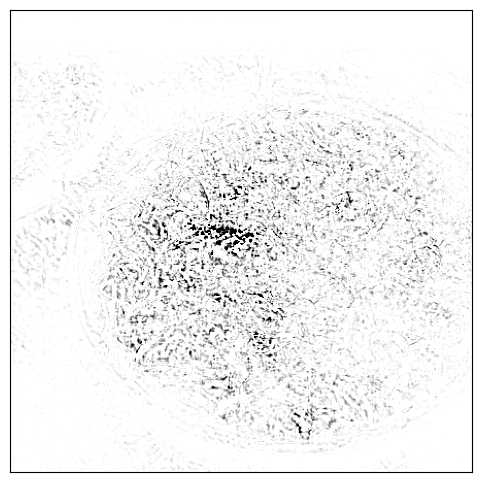

In [64]:
_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=False,
                             sign='positive',
                             outlier_perc=1)

In [1]:
def get_cdict():
    _jet_data = {
              # 'red':   ((0.00, 0, 0),
              #          (0.35, 0, 0),
              #          (0.66, 1, 1),
              #          (0.89, 1, 1),
              #          (1.00, 0.5, 0.5)),
              'red':   ((0.00, 0, 0),
                       (0.35, 0.5, 0.5),
                       (0.66, 1, 1),
                       (0.89, 1, 1),
                       (1.00, 0.8, 0.8)),
             'green': ((0.000, 0, 0),
                       (0.125, 0, 0),
                       (0.375, 1, 1),
                       (0.640, 1, 1),
                       (0.910, 0.3, 0.3),
                       (1.000, 0, 0)),
             # 'blue':  ((0.00, 0.5, 0.5),
             #           (0.11, 1, 1),
             #           (0.34, 1, 1),
             #           (0.65, 0, 0),
             #           (1.00, 0, 0))}
             'blue':  ((0.00, 0.30, 0.30),
                       (0.25, 0.8, 0.8),
                       (0.34, 0.8, 0.8),
                       (0.65, 0, 0),
                       (1.00, 0, 0))
             }
    return _jet_data

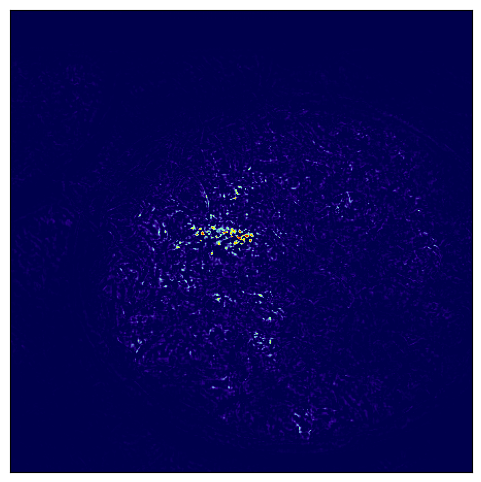

In [66]:
import matplotlib
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", 
    [(0, "blue"), (0.5, "white"), (1, "red")]
)
cdict = get_cdict()
cmap = matplotlib.colors.LinearSegmentedColormap("jet_revice", cdict)
_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             cmap=cmap,
                             show_colorbar=False,
                             sign='positive',
                             outlier_perc=1)

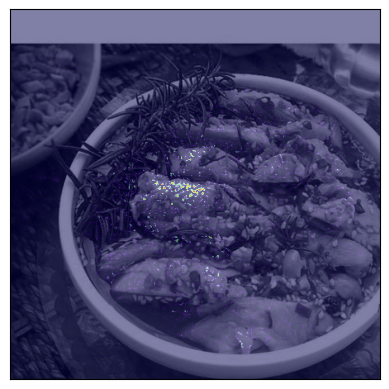

In [67]:
fig, ax =plt.subplots()
_ = viz.visualize_image_attr(
                np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1, 2, 0)),
                np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1, 2, 0)),
                method='blended_heat_map',
                cmap=cmap,
                show_colorbar=False,
                sign='positive',
                outlier_perc=1,
                plt_fig_axis=(fig, ax)
                # title='Blended Heat Map'
)


# Save the figure
output_path = os.path.join(output_dir, 'heat_caml_' + str(target) + pit_n)
fig.savefig(output_path)

In [70]:
# from captum.attr import NoiseTunnel
# noise_tunnel = NoiseTunnel(integrated_gradients)

# attributions_ig_nt = noise_tunnel.attribute(input, nt_samples=10, nt_type='smoothgrad_sq', target=194)
# _ = viz.visualize_image_attr_multiple(np.transpose(attributions_ig_nt.squeeze().cpu().detach().numpy(), (1,2,0)),
#                                       np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
#                                       ["original_image", "heat_map"],
#                                       ["all", "positive"],
#                                       cmap=default_cmap,
#                                       show_colorbar=True)
data = [
    "015_000101heat", "021_5.015719793109707heat", "027_000059heat", "024_000059heat",
    "046_000010heat", "051_000025heat", "063_63n000001heat", "076_76n000009heat",
    "073_000109heat", "100_000050heat", "109_000009heat", "124_000001heat",
    "122_000033heat", "129_000024heat", "126_000029heat", "134_000042heat",
    "144_000071heat", "156_156n000000heat", "192_410.82251889566675heat", "194_000000heat",
    "207_000031heat", "216_8.78442873590168heat", "218_2.7672608330720756heat",
    "219_1.8203088069711892heat", "225_6.320396054494243heat", "228_8.067893909653899heat",
    "229_5.30089462658354heat", "232_2.980463359419659heat", "234_13.644777726796848heat",
    "237_10.172250266846223heat", "240_1.7018671383949395heat"
]

# Initialize empty lists to store the results
class_targets = []
file_names = []

for item in data:
    # Split the string at the underscore
    parts = item.split('_')
    # Extract the class target and the file name
    class_target = parts[0]
    file_name = parts[1].replace("heat", "")
    
    # Append the results to the lists
    class_targets.append(class_target)
    file_names.append(file_name)

# Print the results
print("Class targets:", class_targets)
print("File names:", file_names)


Class targets: ['015', '021', '027', '024', '046', '051', '063', '076', '073', '100', '109', '124', '122', '129', '126', '134', '144', '156', '192', '194', '207', '216', '218', '219', '225', '228', '229', '232', '234', '237', '240']
File names: ['000101', '5.015719793109707', '000059', '000059', '000010', '000025', '63n000001', '76n000009', '000109', '000050', '000009', '000001', '000033', '000024', '000029', '000042', '000071', '156n000000', '410.82251889566675', '000000', '000031', '8.78442873590168', '2.7672608330720756', '1.8203088069711892', '6.320396054494243', '8.067893909653899', '5.30089462658354', '2.980463359419659', '13.644777726796848', '10.172250266846223', '1.7018671383949395']
